In [1]:
!pip install tensornetwork jax jaxlib

In [2]:
import numpy as np
import jax
import tensornetwork as tn
from IPython.display import Image

In [3]:
node = tn.Node(np.eye(2))
print(node.tensor)  # This is how you access the underlying tensor.

[[1. 0.]
 [0. 1.]]


This creates a node with two unconnected or "dangling" edges corresponding to the $2 \times 2$ matrix:

$ -\bullet - \ \ = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$

In [4]:
a = tn.Node(np.eye(2))
b = tn.Node(np.eye(2))
c = tn.Node(np.eye(2))
# Dangling edges are automatically created at node creation.
# We can access them this way.
dangling_edge1 = a.get_edge(1)

This gets the edge $a[1]$ for the two-edged node corresponding to the $2 \times 2$ matrix:

$-\bullet - \ = \ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$

In [5]:
# Create a standard edge by connecting any two separate nodes together.
# We create a new edge by "connecting" two dangling edges.
standard_edge = a[0] ^ b[0] # same as tn.connect(a[0], b[0])

This creates a conncted edge between the two nodes for $a$ and $b$ by connecting $a[0]$ and $b[0]$:

$-\bullet - \bullet -$

In [6]:
# Create a trace edge by connecting a node to itself.
trace_edge = c[0] ^ c[1]

This creates a node with a loop by connecting the two edges $c[0]$ and $c[1]$ of the tensor node $c$. 

In [7]:
# This is the same as above but for the tensor b
dangling_edge2 = b[1]

In [8]:
# Next, we add the nodes containing our vectors.
# Either tensorflow tensors or numpy arrays are fine.
a = np.array([1., 2., 3.])
a = tn.Node(a)

b = np.array([4., 5., 6.])
b = tn.Node(b)

c = np.ones(3)
c = tn.Node(c)

edge1 = a[0] ^ b[0] # = tn.connect(a[0], c[0])
# edge2 = a[0] ^ c[0]

d = tn.contract(edge1) 
# e = tn.contract(edge2)
# contraction gives inner product in this case
# You can access the underlying tensor of the node via `node.tensor`.
# To convert a Eager mode tensorflow tensor into 
print(a.tensor)
print(b.tensor)
print(c.tensor)

print(d.tensor)
# print(e.tensor)

[1. 2. 3.]
[4. 5. 6.]
[1. 1. 1.]
32.0


Each vector is represented as a node with one "dangling" edge

$ a = \begin{pmatrix} 1. \\ 2. \\ 3. \end{pmatrix}\ \  = \quad \bullet- \quad$
$ b = \begin{pmatrix} 4. \\ 5. \\ 6. \end{pmatrix}\ \  = \quad \bullet- \quad$
$ c = \begin{pmatrix} 1. \\ 1. \\ 1. \end{pmatrix}\ \  = \quad \bullet- \quad$

Connecting the dangling edge of the vectors $\mathbf{a}$ and $\mathbf{b}$ gives an inner product when the edge is contracted.

$ d = \langle a, b \rangle = \sum_{i = 0}^2 a_ib_i = \quad \sum_i \bullet-_i-\bullet \quad = \quad 1\cdot 4 +2\cdot 4 + 3\cdot 6 = 32$

We can use networkX to visualize this with the following code. The node for the vector $\mathbf{a}$ is labeled $"1"$ and the node for the vector $\mathbf{b}$ is labeled $"2"$:

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
G = nx.Graph()
G.add_nodes_from([1, 2])
G.add_edge(1, 2)

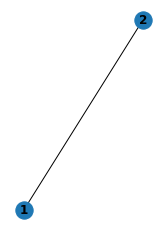

In [44]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [12]:
T = np.array( [ [[1,2],[3,4],[5,6]] , [[1,2],[3,4],[5,6]] ]) #2-by-3-by-2 array
T = tn.Node(T) # three edge tensor node

u = tn.Node(np.ones(3)) # 3-dimensional vector

edge = u[0] ^ T[1] # connect edge of u to edge T[1] of T

# Inner product sums along the 3 indices of T[1] and u[0]
# This gives a 2-by-2 matrix S by contracting the edge T[0]
S = tn.contract(edge) 

print(u.tensor)
print(T.tensor)
print(S.tensor)

[1. 1. 1.]
[[[1 2]
  [3 4]
  [5 6]]

 [[1 2]
  [3 4]
  [5 6]]]
[[ 9. 12.]
 [ 9. 12.]]


The tensor $\mathbf{T}_{i,j,k}$ is a rank $3$ tensor represented as a $2 \times 3 \times 2$ numpy array: 

$\mathbf{T} = \begin{pmatrix} \begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix} \\ \begin{pmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{pmatrix}  \end{pmatrix}$

Here the indices $i$ and $k$ range over the index set $\{1,2\}$, and the index $j$ ranges over $\{1,2,3\}$. The tensor $\mathbf{T}$ can be represented as a node with three dangling edges $T[0], T[1],$ and $T[2]$. The edge $T[1]$ correspnds to the index $j$ and can be connected to a dangling edge of the vector

$u = \begin{pmatrix}1. \\ 1. \\ 1. \end{pmatrix}$

Connecting the dangling edge of $\mathbf{u}$ to the dangling edge of $\mathbf{T}$ gives a contraction:

$ \sum_{j = 0}^2 T_{i,j,k}u_j = \quad \begin{pmatrix} 9 & 12 \\ 9 & 12 \end{pmatrix}$

In [13]:
T = np.array( [ [[1,2],[3,4],[5,6]] , [[1,2],[3,4],[5,6]] ]) #2-by-3-by-2 array
T = tn.Node(T) # three edge tensor node

u = tn.Node(np.ones(3)) # 3-dimensional vector
v = tn.Node(np.ones(2)) # 3-dimensional vector
w = tn.Node(np.ones(2)) # 3-dimensional vector

edge1 = u[0] ^ T[1] # connect edge of u to edge T[1] of T
edge2 = v[0] ^ T[0] # connect edge of u to edge T[1] of T
edge3 = w[0] ^ T[2] # connect edge of u to edge T[1] of T

X = tn.contract(edge1)
Y = tn.contract(edge2)
Z = tn.contract(edge3)

print(u.tensor)
print(v.tensor)
print(w.tensor)
print(T.tensor)
print(X.tensor)
print(Y.tensor)
print(Z.tensor)

[1. 1. 1.]
[1. 1.]
[1. 1.]
[[[1 2]
  [3 4]
  [5 6]]

 [[1 2]
  [3 4]
  [5 6]]]
[[ 9. 12.]
 [ 9. 12.]]
[18. 24.]
42.0


We can visualize the rank $3$ tensor $\mathbf{T}$ with networkX (see below) as a node labeled $"4"$ with three edges. Connecting the three edges of $\mathbf{T}$ to the dangling edges of the vectors $\mathbf{u, v, w}$ represented by nodes labeled $"1, 2",$ and $"3"$ (each with a single edge) gives us a graph with three contractible edges. The first contraction reduces the rank three tensor to a $2 \times 2$ matrix. The second contraction yields a two-dimensional vector. The final contraction yields a scalar:

$\sum_{j = 0}^2 T_{i,j,k}u_j = \quad \begin{pmatrix} 9. & 12. \\ 9. & 12. \end{pmatrix} = X$

$ \sum_{i = 0}^1 X_{i, k} v_i \ = \ \begin{pmatrix} 18. & 24. \end{pmatrix} = Y$

$ \sum_{k = 0}^1 Y_k w_k \ = \ 42.0 = Z$

In [14]:
H = nx.Graph()
H.add_nodes_from([1, 4])
H.add_edge(1, 4)
H.add_edge(2, 4)
H.add_edge(3, 4)

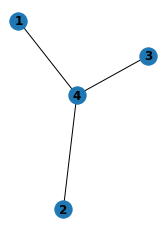

In [15]:
plt.subplot(121)
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

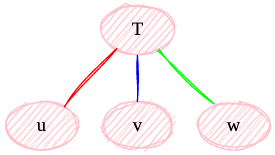

In [16]:
Image("/Users/amelieschreiber/Projects/Grapgviz/image (1).png")

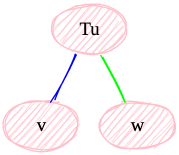

In [17]:
Image("/Users/amelieschreiber/Projects/Grapgviz/image (2).png")

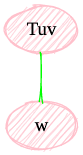

In [18]:
Image("/Users/amelieschreiber/Projects/Grapgviz/image (3).png")

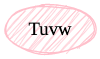

In [19]:
Image("/Users/amelieschreiber/Projects/Grapgviz/image (4).png")

In [20]:
a = tn.Node(np.eye(2))
# Notice that a[0] is actually an "Edge" type.
print("The type of a[0] is:", type(a[0]))
# This is a dangling edge, so this method will 
print("Is a[0] dangling?:", a[0].is_dangling())

The type of a[0] is: <class 'tensornetwork.network_components.Edge'>
Is a[0] dangling?: True


In [21]:
trace_edge = a[0] ^ a[1]
# Notice now that a[0] and a[1] are actually the same edge.
print("Are a[0] and a[1] the same edge?:", a[0] is a[1])
print("Is a[0] dangling?:", a[0].is_dangling())

Are a[0] and a[1] the same edge?: True
Is a[0] dangling?: False


## Optimized Contractions
At intermediate states of a computation, it’s very common for two nodes to have multiple edges connecting them. If only one of those edges is contracted, then all of the remaining edges become trace edges. This is usually very inefficient, as the new node will allocate significantly more memory than is ultimately required. Since trace edges only sum the diagonal of the underlying matrix, all of the other values calculated during the first contraction are useless. It is always more efficient to contract all of these edges simultaneously.

The methods contract_between or contract_parallel will do this for you automatically. You should see huge speedups when comparing these methods against contracting one edge at a time.

In [22]:
def one_edge_at_a_time(a, b):
  node1 = tn.Node(a)
  node2 = tn.Node(b)
  edge1 = node1[0] ^ node2[0]
  edge2 = node1[1] ^ node2[1]
  tn.contract(edge1)
  result = tn.contract(edge2)
  return result.tensor

def use_contract_between(a, b):
  node1 = tn.Node(a)
  node2 = tn.Node(b)
  node1[0] ^ node2[0]
  node1[1] ^ node2[1]
  # This is the same as
  # tn.contract_between(node1, node2)
  result = node1 @ node2
  return result.tensor

a = np.ones((1000, 1000))
b = np.ones((1000, 1000))

In [23]:
%%time
one_edge_at_a_time(a, b)

CPU times: user 176 ms, sys: 15.6 ms, total: 191 ms
Wall time: 151 ms


array(1000000.)

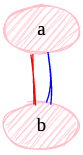

In [24]:
Image("/Users/amelieschreiber/Projects/Grapgviz/tensor_network_contractA_sketchy.png")

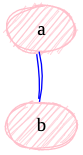

In [25]:
Image("/Users/amelieschreiber/Projects/Grapgviz/tensor_network_contractB_sketchy.png")

In [26]:
%%time
use_contract_between(a, b)

CPU times: user 3.63 ms, sys: 2.6 ms, total: 6.24 ms
Wall time: 149 ms


array(1000000.)

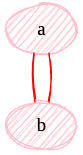

In [27]:
Image("/Users/amelieschreiber/Projects/Grapgviz/tensor_network_contract_all_sketchy.png")

As we can see, the first option took significantly more time to run than the second. This difference becomes much more apparent if we use rank three tensors:

In [28]:
def one_edge_at_a_time(a, b):
  node1 = tn.Node(a)
  node2 = tn.Node(b)
  edge1 = node1[0] ^ node2[0]
  edge2 = node1[1] ^ node2[1]
  edge3 = node1[2] ^ node2[2]
  tn.contract(edge1)
  tn.contract(edge2)
  result = tn.contract(edge3)
  return result.tensor

def use_contract_between(a, b):
  node1 = tn.Node(a)
  node2 = tn.Node(b)
  node1[0] ^ node2[0]
  node1[1] ^ node2[1]
  node1[2] ^ node2[2]
  # This is the same as
  # tn.contract_between(node1, node2)
  result = node1 @ node2
  return result.tensor

a = np.ones((1000, 1000, 10))
b = np.ones((1000, 1000, 10))

In [29]:
%%time
one_edge_at_a_time(a, b)

CPU times: user 15.7 s, sys: 1.88 s, total: 17.6 s
Wall time: 14.3 s


array(10000000.)

This contracts the three edges sequentially as viualized in the following three images generated using Graphviz:

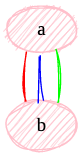

In [30]:
Image("/Users/amelieschreiber/Projects/Grapgviz/tensor_network_contract1_sketchy.png")

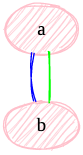

In [31]:
Image("/Users/amelieschreiber/Projects/Grapgviz/tensor_network_contract2_sketchy.png")

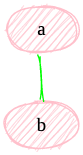

In [32]:
Image("/Users/amelieschreiber/Projects/Grapgviz/tensor_network_contract3_sketchy.png")

In [33]:
%%time
use_contract_between(a, b)

CPU times: user 495 ms, sys: 145 ms, total: 639 ms
Wall time: 1.75 s


array(10000000.)

This can be visualized as two nodes with three edges between them (since both are rank-3 tensors). The image was generated using Graphviz:

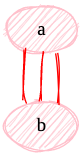

In [34]:
Image("/Users/amelieschreiber/Projects/Quantum_Computing/Surface_Codes/tensor_network_sketchy.png")

In this case, with rank-3 tensors $\mathbf{a}$ and $\mathbf{b}$, which are $1000 \times 1000 \times 10$ numpy arrays, the speedup is even more significant when using tn.contract_between(node1, node2) as apposed to contracting the edges sequentially. If we were to increase the third diemsnion od the two tensors to $100$ or $1000$ and the computation becomes prohibitively expensive on some hardware. 

## Axis naming
Sometimes, using the axis number is very inconvient and it can be hard to keep track of the purpose of certain edges. To make it easier, you can optionally add a name to each of the axes of your node. Then you can get the respective edge by indexing using the name instead of the number.

In [35]:
# Here, a[0] is a['alpha'] and a[1] is a['beta']
a = tn.Node(np.eye(4), axis_names=['alpha', 'beta'])
edge = a['alpha'] ^ a['beta']
result = tn.contract(edge)
print(result.tensor)

4.0


This is equivalent to computing the trace of the matrix 

$\mathbf{a} = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{pmatrix}$ 

and is represented graphically by connecting the two dangling edges of the node for $\mathbf{a}$ to create a loop, then contracting the loop to obtain a node with no edges, representing the scalar value given by the trace, $Tr(\mathbf{a}) = \sum_{i=0}^3 a_i = 4$. We visualize this again in Graphviz, where the red loop comes from connecting the edge 'alpha" to the edge 'beta':

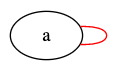

In [36]:
Image("/Users/amelieschreiber/Projects/Quantum_Computing/Surface_Codes/tensor_network2.png")